In [1]:
import matplotlib.pyplot as plt
from os import getcwd
import torch
from torch.distributions import multivariate_normal

from algorithm_package.algorithm_package import paper_algorithm
#from energy_package.energy_package import two_param
from energy_package.energy_package import XY
from rf_package.rf_package import planar_flow
#from plot_animation_package.plot_animation_package import density_2D
from plot_animation_package.plot_animation_package import XYd2n2


In [9]:
# MODEL PARAMETERS
data_dim = 50*50 #size of the parameter space, N
beta = 1e3
#U = two_param.bistable_circle
#BC = two_param.bistable_circle_BC
U = XY.XYd2n2
BC = XY.XYd2n2_BC
energy_parameters = [1, 1, 1, torch.pi] # J, mu, h, theta]

# SAVING PARAMETER
model_name = 'XYd2n2-multivariate_normal-LayeredPlanarFlow-beta1e3'
model_file = getcwd()+"\\saved_models"+"\\"+model_name+"\\"+model_name

# RF PARAMETERS
n = 30 #number of initial samples
base_distribution = multivariate_normal.MultivariateNormal(loc=torch.zeros(data_dim), covariance_matrix=torch.eye(data_dim))
renormalization_flow = planar_flow.LayeredPlanarFlow(data_dim)
epsilon = 1e-2 #gradient descent rate for RF parameters

# MALA PARAMETERS
time_step = 1e-1
k_lang = 10

# INITIALISATION
initial_data = torch.rand(n*data_dim).reshape(n,data_dim)*20-10
k_max = 200

# RUN
RF_MCMC_parameters = [time_step, k_max, k_lang, epsilon]
history, array_of_model_configurations = paper_algorithm.NF_MCMC_algorithm(model_name, beta, U, BC, energy_parameters, renormalization_flow, initial_data, base_distribution, *RF_MCMC_parameters)

100%|██████████| 199/199 [02:57<00:00,  1.12it/s]


Text(0, 0.5, 'iteration')

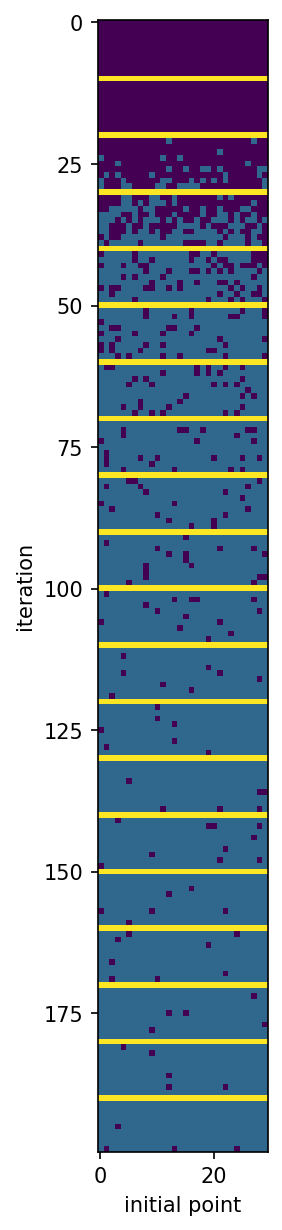

In [10]:
fig, ax = plt.subplots(figsize = (5,10))
ax.imshow(history)
ax.set_xlabel('initial point')
ax.set_ylabel('iteration')

In [4]:
density_2D.plot(beta, U, energy_parameters, model_file, renormalization_flow, base_distribution)

NameError: name 'density_2D' is not defined

MovieWriter imagemagick unavailable; using Pillow instead.


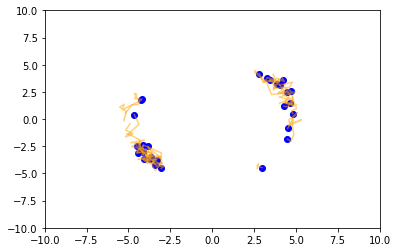

In [5]:
density_2D.animation(model_file, n, k_max, array_of_model_configurations, history)

MovieWriter imagemagick unavailable; using Pillow instead.


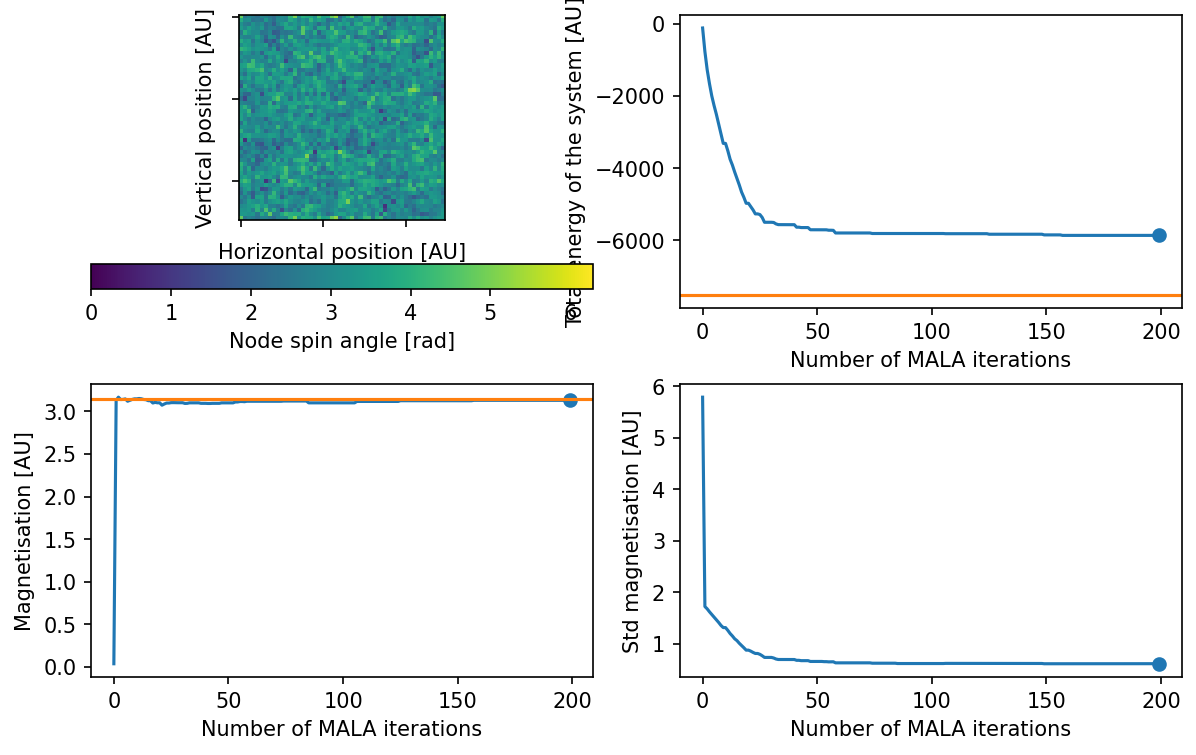

In [11]:
trajectory_id = 0
XYd2n2.trajectory(model_file, trajectory_id, k_max, k_lang, U, energy_parameters, array_of_model_configurations)